# Modelos Generativos para Recuperação de Informação

Nome: Arthur Pontes Nader

Matrícula: 2019022294

## Extração de entidades

In [18]:
import spacy
from spacy import displacy

In [19]:
spacy.__version__

'3.5.3'

In [20]:
pln = spacy.load('pt_core_news_sm')
pln

In [6]:
arq = open("bras.txt", "r")
texto = arq.read()
arq.close()

documento = pln(texto)

In [7]:
print(texto)

Mas, já que falei nos meus dois tios, deixem-me fazer aqui um curto esboço genealógico. O fundador da minha família foi um certo Damião Cubas, que floresceu na primeira metade do século XVIII. Era tanoeiro de ofício, natural do Rio de Janeiro, onde teria morrido na penúria e na obscuridade, se somente exercesse a tanoaria. Mas não; fez-se lavrador, plantou, colheu, permutou o seu produto por boas e honradas patacas, até que morreu, deixando grosso cabedal a um filho, licenciado Luís Cubas. Neste rapaz é que verdadeiramente começa a série de meus avós _ dos avós que a minha família sempre confessou, porque o Damião Cubas era afinal de contas um tanoeiro, e talvez mau tanoeiro, ao passo que o Luís Cubas estudou em Coimbra, primou no Estado, e foi um dos amigos particulares do vice-rei Conde da Cunha.
Como este apelido de Cubas lhe cheirasse excessivamente a tanoaria, alegava meu pai, bisneto de Damião, que o dito apelido fora dado a um cavaleiro, herói nas jornadas da África, em prêmio d

In [8]:
for ent in documento.ents:
    print(ent.text, ent.label_)

Damião Cubas PER
Rio de Janeiro LOC
Luís Cubas PER
Damião Cubas PER
Luís Cubas PER
Coimbra LOC
Estado LOC
Conde da Cunha PER
Cubas LOC
Damião PER
da África LOC
Releva LOC
Brás Cubas PER
Vila de São Vicente LOC
Brás LOC
Venância MISC
Cotrim LOC


In [9]:
displacy.render(documento, style = "ent", jupyter = True)

In [10]:
texto_lower = texto.lower()
documento = pln(texto_lower)

In [11]:
print(texto_lower)

mas, já que falei nos meus dois tios, deixem-me fazer aqui um curto esboço genealógico. o fundador da minha família foi um certo damião cubas, que floresceu na primeira metade do século xviii. era tanoeiro de ofício, natural do rio de janeiro, onde teria morrido na penúria e na obscuridade, se somente exercesse a tanoaria. mas não; fez-se lavrador, plantou, colheu, permutou o seu produto por boas e honradas patacas, até que morreu, deixando grosso cabedal a um filho, licenciado luís cubas. neste rapaz é que verdadeiramente começa a série de meus avós _ dos avós que a minha família sempre confessou, porque o damião cubas era afinal de contas um tanoeiro, e talvez mau tanoeiro, ao passo que o luís cubas estudou em coimbra, primou no estado, e foi um dos amigos particulares do vice-rei conde da cunha.
como este apelido de cubas lhe cheirasse excessivamente a tanoaria, alegava meu pai, bisneto de damião, que o dito apelido fora dado a um cavaleiro, herói nas jornadas da áfrica, em prêmio d

In [12]:
for ent in documento.ents:
    print(ent.text, ent.label_)

rio de janeiro LOC
luís cubas PER
luís cubas PER
coimbra LOC
conde da cunha PER
da áfrica LOC
brás cubas PER
são vicente LOC
brás PER


In [13]:
displacy.render(documento, style = "ent", jupyter = True)

#### ChatGPT

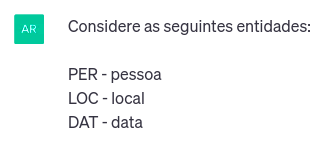

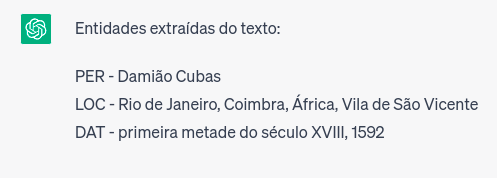

Tentando mais uma vez:

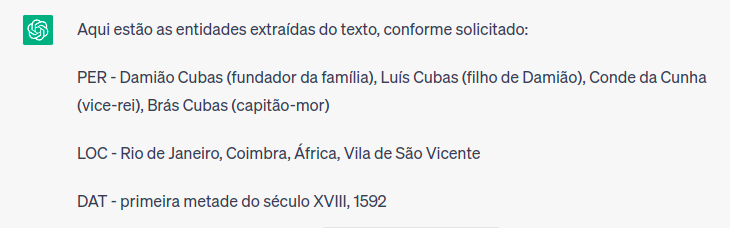

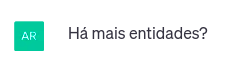

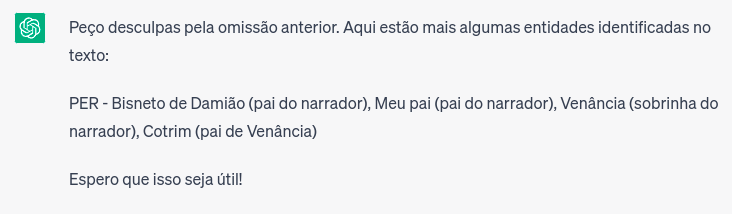

Agora, para o texto em minúsculo

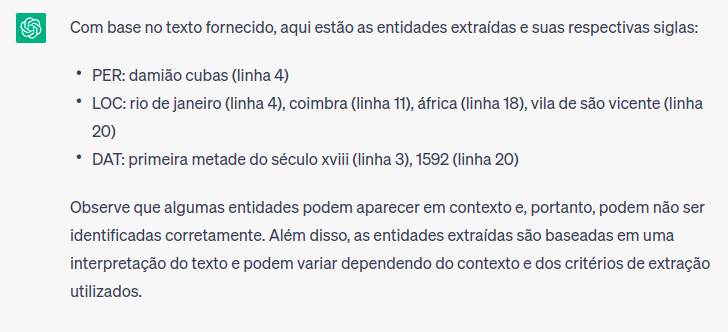

Nova tentativa, pedindo para extrair todas as entidades possíveis:

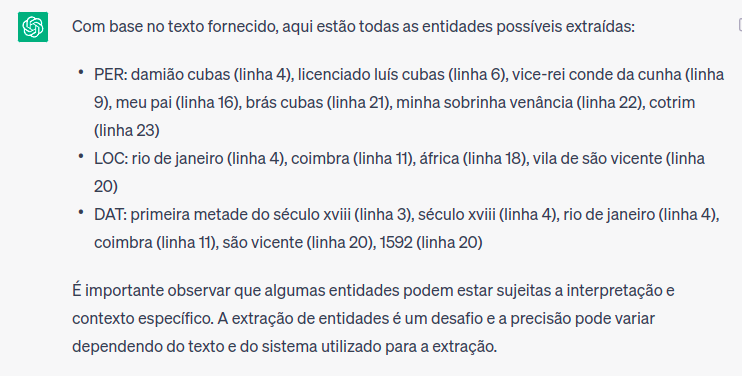

Extraindo entidades do texto de uma página

In [1]:
import asyncio

from playwright.async_api import async_playwright
from bs4 import BeautifulSoup

In [11]:
async def extrair_texto(url):
    
    playwright = await async_playwright().start()
    browser = await playwright.chromium.launch(headless = True)
    page = await browser.new_page()
    await page.goto(url)
    
    page_data = await page.content()
        
    texto = await page.evaluate('''() => {
        const elements = [...document.querySelectorAll('body *')];
        return elements
            .filter(element => element.offsetParent !== null)
            .map(element => element.innerText)
            .join(' ');
    }''')
        
    return texto

In [12]:
loop = asyncio.get_event_loop()
resultados = loop.create_task(extrair_texto("https://pm-arantina.publicacao.siplanweb.com.br/contratos/dados-contrato/716"))

In [13]:
texto = resultados.result()
print(texto)

Login
PORTAL DA TRANSPARÊNCIA
PREFEITURA MUNICIPAL DE ARANTINA Login Login Login PORTAL DA TRANSPARÊNCIA  PREFEITURA MUNICIPAL DE ARANTINA Início
Consultas 
Sumário de Termos
Links 
Fale Conosco
Acessibilidade
A -
A
A + Início Consultas 
Sumário de Termos
Links 
Fale Conosco
Acessibilidade
A -
A
A + Consultas 
Sumário de Termos
Links  Consultas  Consultas  Sumário de Termos Sumário de Termos Links  Links  Fale Conosco
Acessibilidade
A -
A
A + Fale Conosco Fale Conosco Acessibilidade
A -
A
A + Acessibilidade  A - A A +   Início
Contratos
Dados do contrato

Dados atualizados em: 03/06/2023.

Dados do contrato
Número do contrato: 1
Ano do contrato: 2023
Data da assinatura: 02/01/2023
Data da publicação: 02/01/2023
Veículo de publicação: Quadro de avisos e web site
Vigência inicial: 02/01/2023
Vigência final: 01/01/2024
Tipo de contrato: Contratos de Serviços
Subtipo de contrato: Fornecimento de Serviços
Número do processo: 144
Ano do processo: 2022
Modalidade: Inexigibilidade
Natureza do 

In [21]:
documento = pln(texto)

In [22]:
for ent in documento.ents:
    print(ent.text, ent.label_)

Login
PORTAL MISC
PREFEITURA ORG
MUNICIPAL MISC
Login Login Login PORTAL PER
PREFEITURA ORG
MUNICIPAL ORG
Acessibilidade
A -
 LOC
Início Consultas 
Sumário de Termos
 PER
Acessibilidade
A -
 LOC
Consultas  Consultas  Sumário de Termos Sumário de Termos Links  Links  Fale Conosco
Acessibilidade
A PER
Acessibilidade  A - A LOC
Início
Contratos
 PER
Ano MISC
Veículo de publicação MISC
Quadro MISC
Vigência MISC
Vigência MISC
Tipo MISC
Contratos de Serviços
Subtipo LOC
Fornecimento de Serviços
 LOC
Ano do processo MISC
Modalidade MISC
Inexigibilidade
Natureza do Procedimento: CR LOC
CIS LOC
CENTRO INTEGRADO DE SAÚDE ORG
FLÁVIA JUSTE PER
REINCK MISC
Arantina LOC
CLÁUSULA ORG
CLÁUSULA NONA
 MISC
Prazo MISC
Tipo PER
Multa MISC
Pesquisar
Serviço	Unidade	Qtde MISC
Total	Val MISC
Unit LOC
Total
Processando...
 MISC
Apostilamentos

Utilize LOC
Aditivo ORG
Pesquisar PER
Aditivo	Processo	Contrato	Ata	Data Assinatura	Fornecedor PER
Tipo Registro PER
Ano MISC
Veículo de publicação MISC
Quadro MISC
Vig

In [23]:
displacy.render(documento, style = "ent", jupyter = True)

#### ChatGPT

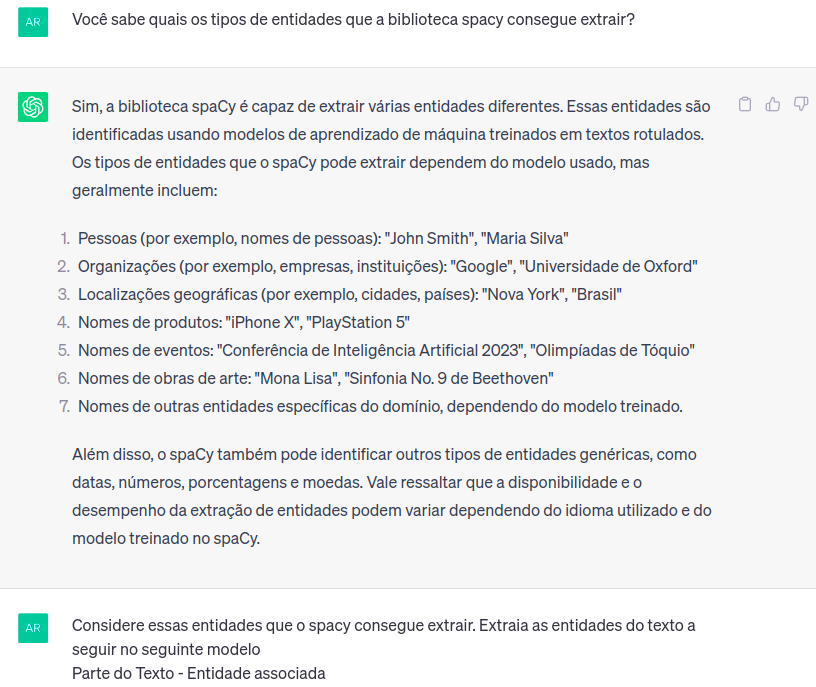

In [24]:
[('PORTAL DA TRANSPARÊNCIA', 'ORG'),
 ('PREFEITURA MUNICIPAL DE ARANTINA', 'ORG'),
 ('Login', 'MISC'),
 ('Consultas', 'MISC'),
 ('Sumário de Termos', 'MISC'),
 ('Links', 'MISC'),
 ('Fale Conosco', 'MISC'),
 ('Acessibilidade', 'MISC'),
 ('Contratos', 'MISC'),
 ('Dados do contrato', 'MISC'),
 ('03/06/2023', 'DATE'),
 ('Número do contrato', 'MISC'),
 ('1', 'CARDINAL'),
 ('Ano do contrato', 'MISC'),
 ('2023', 'DATE'),
 ('Data da assinatura', 'MISC'),
 ('02/01/2023', 'DATE'),
 ('Data da publicação', 'MISC'),
 ('Veículo de publicação', 'MISC'),
 ('Vigência inicial', 'MISC'),
 ('Vigência final', 'MISC'),
 ('Tipo de contrato', 'MISC'),
 ('Contratos de Serviços', 'MISC'),
 ('Subtipo de contrato', 'MISC'),
 ('Fornecimento de Serviços', 'MISC'),
 ('Número do processo', 'MISC'),
 ('144', 'CARDINAL'),
 ('Ano do processo', 'MISC'),
 ('2022', 'DATE'),
 ('Modalidade', 'MISC'),
 ('Inexigibilidade', 'MISC'),
 ('Natureza do Procedimento', 'MISC'),
 ('Contratado', 'MISC'),
 ('CIS - CENTRO INTEGRADO DE SAÚDE DE ANDRELÂNDIA LTDA', 'ORG'),
 ('Valor', 'MISC'),
 ('R$ 91.200,00', 'MONEY'),
 ('Representante', 'MISC'),
 ('FLÁVIA JUSTE PASCHOALINO REINCK', 'PERSON'),
 ('Signatário do contratante', 'MISC'),
 ('EDIMAR LUIS DE OLIVEIRA', 'PERSON'),
 ('Objeto do contrato', 'MISC'),
 ('Credenciamento de empresas para atendimento complementar na forma de realização de ultrassonografias para pacientes do município de Arantina', 'MISC'),
 ('Forma de pagamento', 'MISC'),
 ('CLÁUSULA OITAVA', 'MISC'),
 ('Forma de fornecimento', 'MISC'),
 ('CLÁUSULA NONA', 'MISC'),
 ('Prazo de execução', 'MISC'),
 ('12', 'CARDINAL'),
 ('Tipo de garantia', 'MISC'),
 ('Sem Garantia', 'MISC'),
 ('Multa recisória', 'MISC'),
 ('CLÁUSULA DÉCIMA PRIMEIRA', 'MISC'),
 ('Multa inadimplemento', 'MISC'),
 ('Resultado - Serviço', 'MISC'),
 ('10', 'CARDINAL'),
 ('50', 'CARDINAL'),
 ('200', 'CARDINAL'),
 ('1.000', 'CARDINAL'),
 ('Pesquisar', 'MISC'),
 ('Serviço', 'MISC'),
 ('Unidade', 'MISC'),
 ('Qtde. Total', 'MISC'),
 ('Val. Unit.', 'MISC'),
 ('Val. Total', 'MISC'),
 ('Aditivos / Apostilamentos', 'MISC'),
 ('Aditivo', 'MISC'),
 ('Processo', 'MISC'),
 ('Contrato', 'MISC')]

[('PORTAL DA TRANSPARÊNCIA', 'ORG'),
 ('PREFEITURA MUNICIPAL DE ARANTINA', 'ORG'),
 ('Login', 'MISC'),
 ('Consultas', 'MISC'),
 ('Sumário de Termos', 'MISC'),
 ('Links', 'MISC'),
 ('Fale Conosco', 'MISC'),
 ('Acessibilidade', 'MISC'),
 ('Contratos', 'MISC'),
 ('Dados do contrato', 'MISC'),
 ('03/06/2023', 'DATE'),
 ('Número do contrato', 'MISC'),
 ('1', 'CARDINAL'),
 ('Ano do contrato', 'MISC'),
 ('2023', 'DATE'),
 ('Data da assinatura', 'MISC'),
 ('02/01/2023', 'DATE'),
 ('Data da publicação', 'MISC'),
 ('Veículo de publicação', 'MISC'),
 ('Vigência inicial', 'MISC'),
 ('Vigência final', 'MISC'),
 ('Tipo de contrato', 'MISC'),
 ('Contratos de Serviços', 'MISC'),
 ('Subtipo de contrato', 'MISC'),
 ('Fornecimento de Serviços', 'MISC'),
 ('Número do processo', 'MISC'),
 ('144', 'CARDINAL'),
 ('Ano do processo', 'MISC'),
 ('2022', 'DATE'),
 ('Modalidade', 'MISC'),
 ('Inexigibilidade', 'MISC'),
 ('Natureza do Procedimento', 'MISC'),
 ('Contratado', 'MISC'),
 ('CIS - CENTRO INTEGRADO DE SAÚ